In [11]:
import pandas as pd
import geopandas as gpd
import numpy as np
import h3pandas
from shapely import wkt


In [6]:
df = pd.read_csv('../data/clean/h3_PLUTO.csv',low_memory=False)


In [7]:
gdf = gpd.GeoDataFrame(df)

In [21]:
poi_df = pd.read_csv('../data/raw/points_of_interest.csv')
bbl_to_h3 = pd.read_json('../data/clean//bbl_to_h3.json',orient='index')
bbl_to_h3 = pd.read_json('../data/clean//bbl_to_h3.json',orient='index')



In [16]:
poi_df = poi_df.rename({'the_geom':'geometry'},axis=1)
poi_df['geometry'] = poi_df['geometry'].apply(wkt.loads)
poi_gdf = gpd.GeoDataFrame(poi_df, crs='epsg:4326')

In [19]:
poi_h3 = poi_gdf.h3.geo_to_h3(10)

poi_h3.to_csv('../data/clean/poi_h3.csv')

In [ ]:
import folium

def visualize_hexagons(hexagons, color="red", folium_map=None,clipper=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # polygons1=polygons.copy()
        # for i in polygons1:
        # gpd.GeoDataFrame(polygons1).clip(clipper)
                    
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        # m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron',prefer_canvas=True)
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=11)
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=2,color=color)
        m.add_child(my_PolyLine)
        
    return m
    

def visualize_polygon(polyline, color="red",folium_map=None):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], tiles='cartodbpositron')
    else:
        m = folium_map
    my_PolyLine=folium.PolyLine(locations=polyline,weight=2,color=color)
    m.add_child(my_PolyLine)
    return m

In [ ]:
pluto_grouped = pluto_df2.groupby(['bl_num'],as_index=False).nunique([['bl_num','bctcb2020']])
pluto_df2['bctcb2020'] = pluto_df['bctcb2020'].astype(str)

# pluto_df2['block'] = pluto_df['block'].astype(str)

In [ ]:
# pluto_grouped = pluto_df2[['borough','borocode','block', 'bctcb2020','bl_num']].groupby(['borocode','block']).first()
pluto_df2['bbl'] = pluto_df['bbl'].astype(str)

In [ ]:
pluto_df2[pluto_df2['bl_num'] == 'BK0001']


In [ ]:
pluto_grouped

In [ ]:
pluto_grouped[pluto_grouped['bctcb2020'] == 1][['bl_num']]

In [ ]:
poly_nums = pluto_grouped[pluto_grouped['bctcb2020'] != 1][['bl_num']]

In [ ]:
poly_block = pd.merge( poly_nums,pluto_df2,how='inner',on='bl_num')[['bbl','bctcb2020']]

In [ ]:
poly_block

       Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010  \
0           MN      2    3  101  1000900         None      9   None   
1           MN      1  201    0  1000100         None      1   None   
2           MN      2    2  101  1000900  10009001022      9   1025   
3           MN      3    1  101  1001300  10013002002     13   2005   
4           MN      3   10  101  1031900  10319001006    319   1003   
...        ...    ...  ...  ...      ...          ...    ...    ...   
857001      SI   8050   37  503  5024800  50248001014    248   1016   
857002      SI   8050   62  503  5024800  50248001014    248   1016   
857003      SI   8050   65  503  5024800  50248001014    248   1016   
857004      SI   8050   92  503  5024800  50248001014    248   1016   
857005      SI   8050   94  503  5024800  50248001014    248   1016   

       SchoolDist  Council  ...  FIRM07_FLA PFIRM15_FL  Version  DCPEdited  \
0            None        1  ...           1          1     22v1      

In [8]:
gdf_bk = gdf[gdf['Borough'] == 'BK']

gdf_mn = gdf[gdf['Borough'] == 'MN']

gdf_bk.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010',
       'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4',
       'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2

In [9]:
import libpysal

# create spatial weights matrix
W = libpysal.weights.Queen.from_dataframe(gdf_bk)
X = libpysal.weights.Queen.from_dataframe(gdf_mn)


# get component labels
components_bk = W.component_labels
components_mn = X.component_labels


combined_polygons_bk = gdf_bk.dissolve(by=components_bk)
combined_polygons_mn = gdf_mn.dissolve(by=components_mn)



/home/thowe/anaconda3/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2837 disconnected components.
 There are 394 islands with ids: 1, 20, 46, 70, 71, 74, 88, 91, 115, 134, 157, 158, 161, 162, 170, 176, 206, 207, 219, 238, 240, 243, 256, 270, 277, 329, 357, 367, 473, 482, 514, 631, 687, 688, 708, 713, 726, 732, 752, 768, 784, 793, 834, 858, 861, 880, 1004, 1009, 1010, 1017, 1053, 1095, 1096, 1150, 1249, 1252, 1263, 1265, 1278, 1282, 1284, 1286, 1289, 1291, 1307, 1308, 1309, 1314, 1468, 1584, 1585, 1586, 1756, 1984, 1990, 2197, 2204, 2311, 2312, 2320, 2351, 2488, 2496, 2498, 2505, 2515, 2516, 2597, 2643, 2718, 2965, 3073, 3273, 3669, 3773, 3783, 3789, 3797, 3808, 3811, 3848, 3850, 3882, 3888, 4083, 4336, 4591, 4685, 5041, 5193, 5256, 5282, 5659, 5915, 6456, 6499, 6525, 6541, 6642, 7192, 7236, 7801, 7809, 7938, 7960, 8082, 8499, 8532, 8572, 8615, 8669, 8688, 9141, 9165, 9282, 9452, 9655, 9714, 9738, 9773, 9

ValueError: The truth value of a GeoDataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

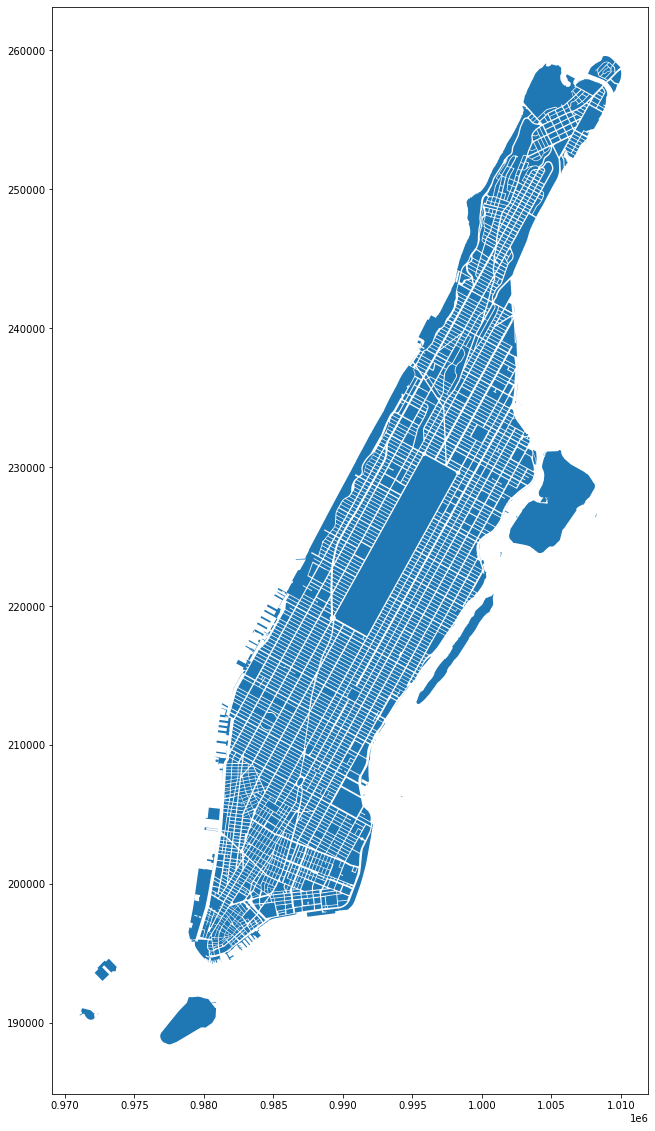

In [18]:
mn = combined_polygons_mn.explode()
mn.plot(figsize=(20,20))
 

In [ ]:
%matplotlib inline
gdf_bk.plot(column='AssessTot',cmap='Purples',figsize=(20,20))
 

In [ ]:
import folium

In [ ]:
import geopandas as gpd
data = gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Blocks_for_2020_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")

In [ ]:
data.plot(column='BoroName',cmap='Pastel1',categorical=True,figsize=(14,14))



In [ ]:
import geoplot
import geoplot.crs as gcrs

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} shapely


In [ ]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [ ]:
%matplotlib inline


In [ ]:
data_bk = data[data['BoroName'] == 'Brooklyn']
data_bk

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path("nyc_boroughs"))
boroughs

In [ ]:
collisions = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))
collisions

In [ ]:
ax = gplt.polyplot(data_bk,projection=gcrs.AlbersEqualArea(),)

In [ ]:
gplt.choropleth(data_bk,hue='Shape__Area',figsize=(20,20))

In [ ]:
data.plot